In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
plt.style.use('dark_background')

In [2]:
data = pd.read_csv('Transformed_Housing_Data2.csv')
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
data['mean_sales'] = data['Sale_Price'].mean()
data['mean_sales'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

# [1] Building ur 1st Predictive Model with Mean prediction


Visualize the mean prediction model

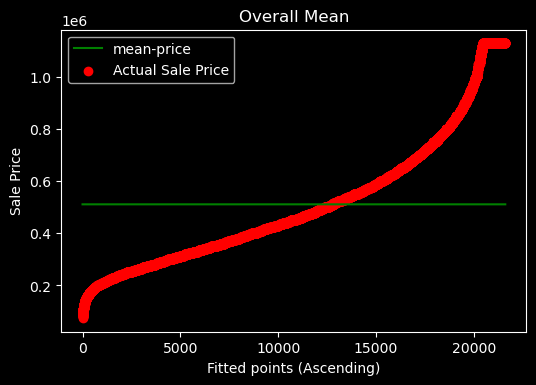

In [4]:
plt.figure(dpi = 100)
k = range(0, len(data))
plt.scatter(k, data['Sale_Price'].sort_values(), color = 'red', label = 'Actual Sale Price')
plt.plot(k, data['mean_sales'].sort_values(), color = 'green', label = 'mean-price')
plt.xlabel('Fitted points (Ascending)')
plt.ylabel("Sale Price")
plt.title('Overall Mean')
plt.legend()

In [5]:
data["Overall Grade"].unique()

array([ 7,  6,  8, 10,  9,  5,  4,  3,  2,  1], dtype=int64)

# Improving upon the mean regression model

In [6]:
grades_mean = data.pivot_table(values = 'Sale_Price', columns = 'Overall Grade', aggfunc = np.mean)
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [7]:
#making a new column
data['grade_mean'] = 0

for i in grades_mean.columns:
    data['grade_mean'][data['Overall Grade'] == i] = grades_mean[i][0]
data['grade_mean'].head()

0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

#

but how does this module compare to the overall mean prediction module
Now, visualize them together

In [8]:
gradewise_list = []
for i in range(1,11):
  k = data["Sale_Price"][data["Overall Grade"] == i]
  gradewise_list.append(k)

In [9]:
classwise_list = []
for i in range(1,11):
  k = data["Sale_Price"][data["Overall Grade"] == i]
  classwise_list.append(k)

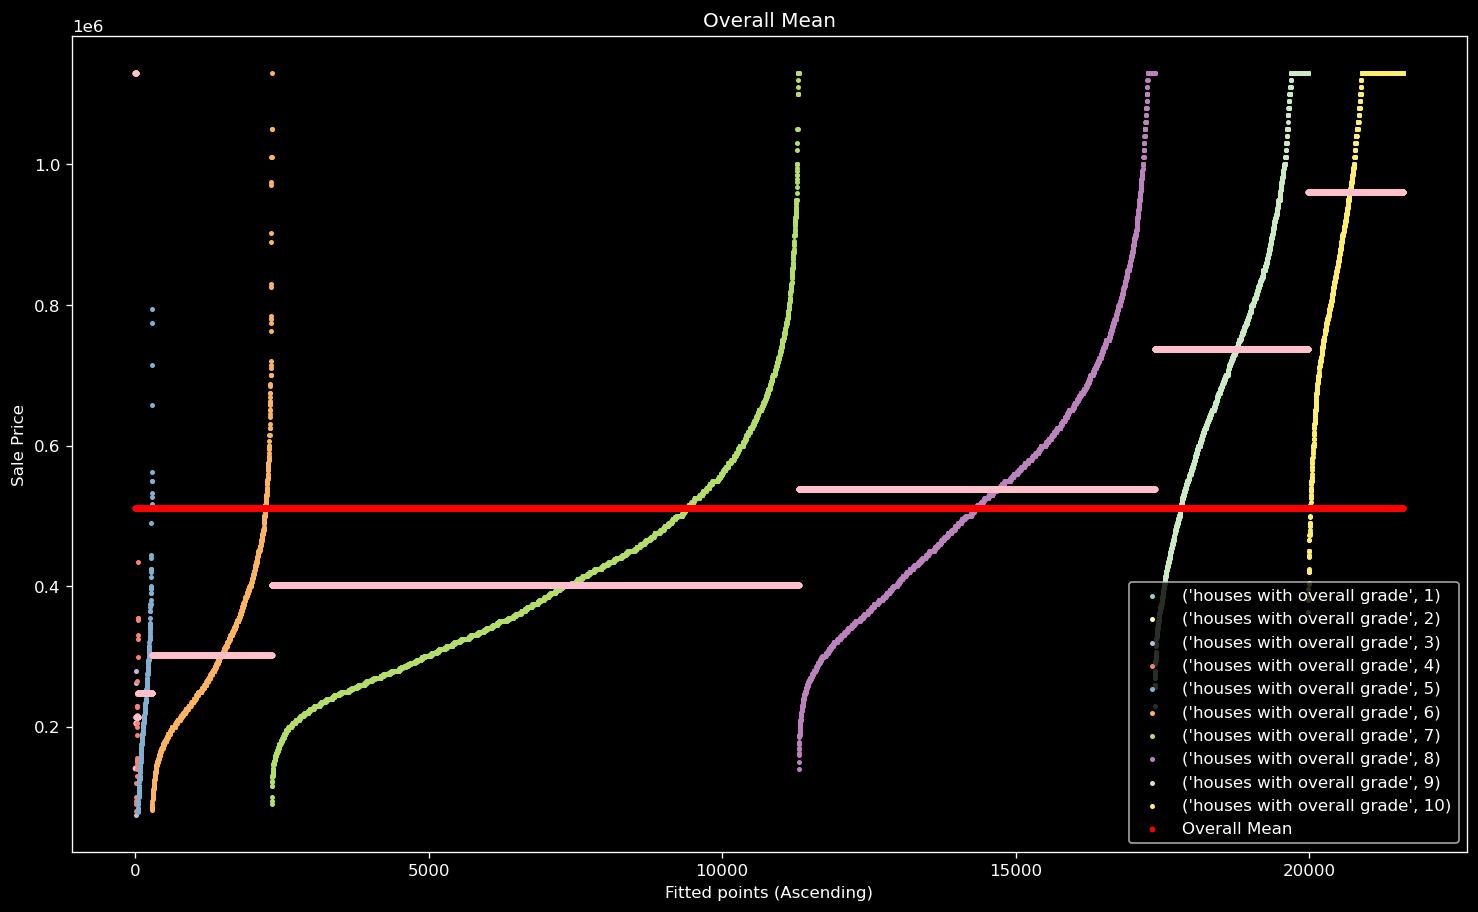

In [10]:
plt.figure( dpi = 120, figsize = (15,9) )

#### Plotting "Sale_Price" gradewise ####
# z variable is for x-axis
z = 0
for i in range(1,11):
  # defining x-axis using z
  points = [k for k in range(z, z + len(classwise_list[i-1]))]
    
  # plotting
  plt.scatter( points, # x-axis
              classwise_list[i-1].sort_values(), # y-axis
              label = ('houses with overall grade', i), s = 4 )
    
  #plotting gradewise mean
  plt.scatter( points,
                [classwise_list[i-1].mean() for q in range(len(classwise_list[i-1]))] ,
               s = 6, color = 'pink')
    
  z = max(points) + 1 # updating z for next plot

#### plotting Overall Mean ####
plt.scatter([q for q in range(0, z)],
         data['mean_sales'],
         color = 'red',
         label = 'Overall Mean',
         s = 6)

plt.xlabel('Fitted points (Ascending)')
plt.ylabel("Sale Price")
plt.title('Overall Mean')
plt.legend( loc = 4)

# Residual Plot

In [11]:
mean_difference = data['mean_sales'] - data['Sale_Price']
grade_mean_difference = data['grade_mean'] - data['Sale_Price']

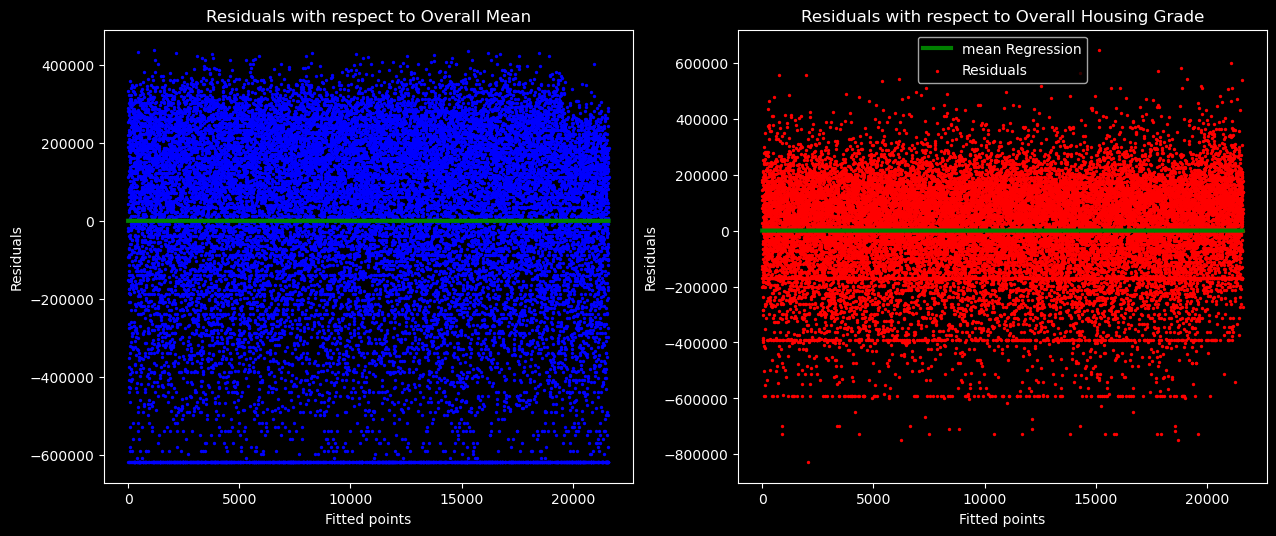

In [12]:
k = range(0, len(data))
l = [0 for i in range(len(data))]

plt.figure( figsize = (15,6), dpi =100)

plt.subplot(1,2,1)
plt.scatter( k , mean_difference, color = 'blue', label = 'Residuals', s = 2 )
plt.plot( k , l, color = 'green', label = 'mean Regression', linewidth = 3)
plt.xlabel('Fitted points')
plt.ylabel("Residuals")
plt.title('Residuals with respect to Overall Mean')

plt.subplot(1,2,2)
plt.scatter( k , grade_mean_difference, color = 'red', label = 'Residuals', s = 2 )
plt.plot( k , l, color = 'green', label = 'mean Regression', linewidth = 3)
plt.xlabel('Fitted points')
plt.ylabel("Residuals")
plt.legend()
plt.title("Residuals with respect to Overall Housing Grade")

plt.legend()

# Model Evaluation Metrices

In [13]:
#MAE(Mean Absolute Error)

mean_error = sum(mean_difference)/len(data)
print(round(mean_error, 7))

0.0


In [14]:
#Define

Y = data["Sale_Price"]
Y_hat1 = data["mean_sales"]
Y_hat2 = data['grade_mean']
n = len(data)

len(Y), len(Y_hat1), len(Y_hat2), n

(21609, 21609, 21609, 21609)

In [15]:
#mean_absolute_error1
cost_mean = sum(abs(Y_hat1 - Y))/n
cost_mean 

199168.78146839526

In [16]:
#mean_absolute_error2
cost_grade_mean = sum(abs(Y_hat2 - Y))/n
cost_grade_mean

137081.70298203363

In [17]:
#scikit learn library

from sklearn.metrics import mean_absolute_error
cost_grade_mean = mean_absolute_error(Y_hat2, Y)
cost_grade_mean

137081.7029820291

In [18]:
#scikit learn library

from sklearn.metrics import mean_squared_error
cost_mean  = mean_squared_error( Y_hat1, Y)
cost_grade_mean = mean_squared_error(Y_hat2, Y)
cost_mean ,cost_grade_mean

(62528116847.799576, 30804835720.342426)

In [19]:
#scikit learn library

from sklearn.metrics import mean_squared_error
cost_mean  = mean_squared_error( Y_hat1, Y)**0.5
cost_grade_mean = mean_squared_error(Y_hat2, Y)**0.5
cost_mean ,cost_grade_mean

(250056.2273725643, 175513.06424406826)

In [20]:
Y = data["Sale_Price"]
Y_bar = data["mean_sales"]
Y_hat = data['grade_mean']
n = len(data)

len(Y), len(Y_bar), len(Y_hat), n

(21609, 21609, 21609, 21609)

In [21]:
mse_mean = mean_squared_error( Y_bar, Y)
mse_mean

62528116847.799576

In [22]:
mse_model = mean_squared_error( Y_hat, Y)
mse_model

30804835720.342426

In [23]:
R2 = 1 - (mse_model / mse_mean)
R2

0.5073442592981836

In [24]:
from sklearn.metrics import r2_score
score = r2_score(Y, Y_hat)
score

0.5073442592981836

# [2]WHAT IS LINEAR REGRESSION?

In [25]:
#comparising of just 2 columns Sale Price & Flat Area

sale_price = data["Sale_Price"].head(30)
flat_area = data['Flat Area (in Sqft)'].head(30)
sample_data = pd.DataFrame({ 'sale_price': sale_price,
                              'flat_area': flat_area})
sample_data

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


## Plotting the data

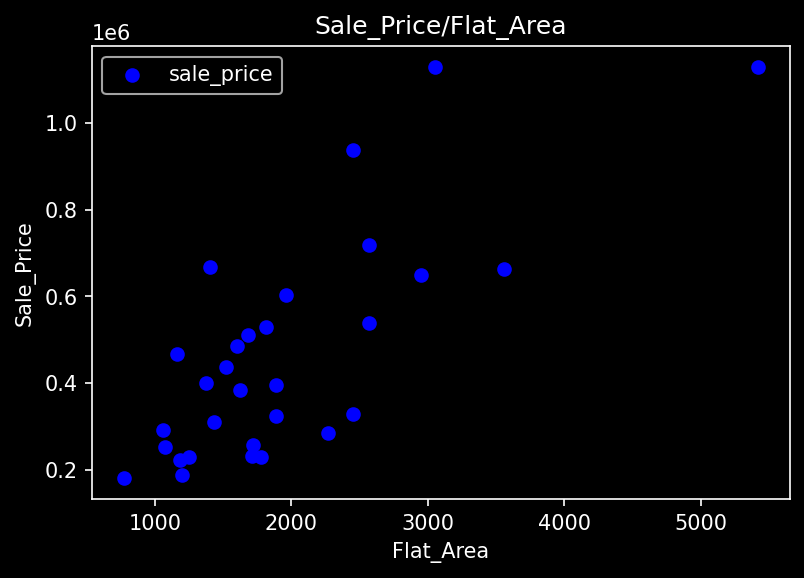

In [26]:
plt.figure( dpi = 150)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color = 'blue', label = 'sale_price')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.title("Sale_Price/Flat_Area")
plt.legend()
plt.show()

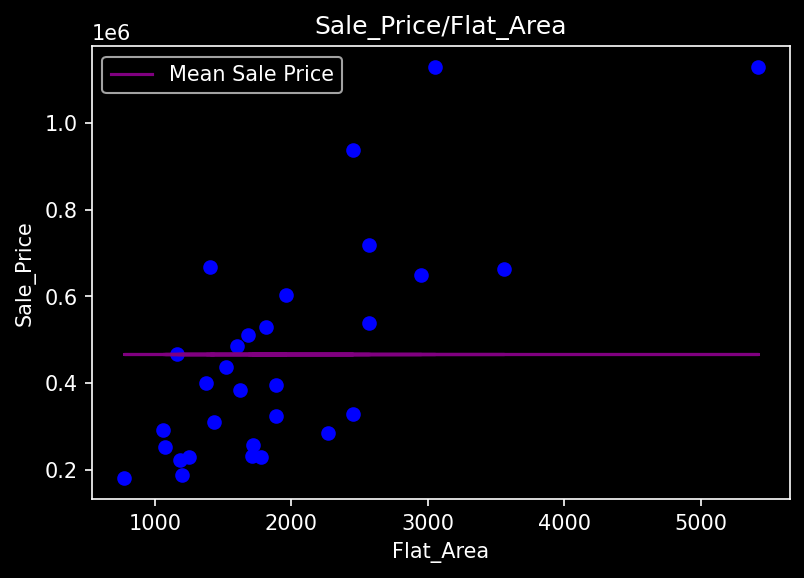

In [136]:
##Creating a new column

sample_data['mean_sale_price'] = sample_data.sale_price.mean()


plt.figure( dpi = 150)
plt.scatter(sample_data.flat_area, sample_data.sale_price, color = 'blue')
plt.plot(sample_data.flat_area, sample_data.mean_sale_price, color = "purple", label = 'Mean Sale Price')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.title("Sale_Price/Flat_Area")
plt.legend()
plt.show()

# Parameter of a linear regression model

In [27]:
#for MSE 

from sklearn.metrics import mean_squared_error as mse

Text(0.5, 1.0, 'Slope 0 with MSE 281372081125.0')

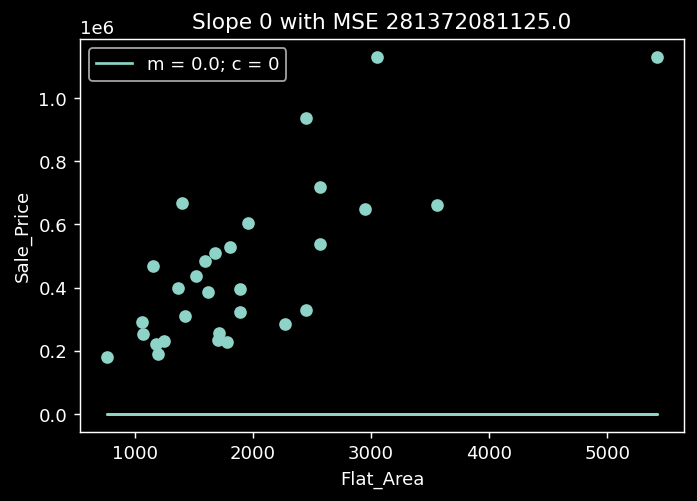

In [28]:
c = 0
m = 0

line = []

for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i] * m + c)

plt.figure(dpi = 130)
plt.scatter(sample_data.flat_area, sample_data.sale_price)
plt.plot(sample_data.flat_area, line, label = 'm = 0.0; c = 0')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.legend()

MSE = mse(sample_data.sale_price, line)
plt.title("Slope "+str(m)+" with MSE "+ str(MSE))

Text(0.5, 1.0, 'Slope 50 with MSE 184728400708.33334')

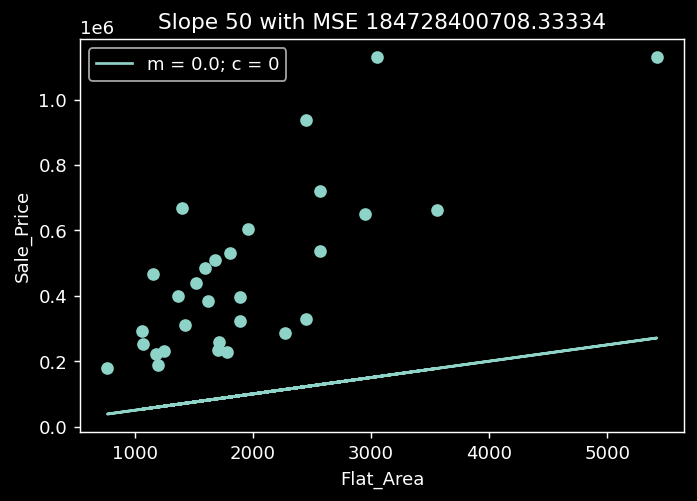

In [298]:
## Now, change the value of slope m=50, and see the result. Again we see that MSE is still large and the line models the data very poorly. 

c = 0
m = 50

line = []

for i in range(len(sample_data)):
    line.append(sample_data.flat_area[i] * m + c)

plt.figure(dpi = 130)
plt.scatter(sample_data.flat_area, sample_data.sale_price)
plt.plot(sample_data.flat_area, line, label = 'm = 0.0; c = 0')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.legend()

MSE = mse(sample_data.sale_price, line)
plt.title("Slope "+str(m)+" with MSE "+ str(MSE))

In [29]:
#TDS & Alternative task

def slope_Error( slope, intercept ,  sample_data):
    sale = []
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i] * slope + intercept
        sale.append(tmp)
    MSE = mse(sample_data.sale_price, sale)
    return MSE

In [30]:
#Define range of the value of slope i.e. different value of slope

slope = [i/10 for i in range(0,5000)]
Cost = []
for i in slope:
    cost = slope_Error( slope = i, intercept = 0, sample_data = sample_data)
    Cost.append(cost)

# Cost Function Curve

In [31]:
# Arranging in DataFrame
Cost_table = pd.DataFrame({
    'slope' : slope,
    'Cost' : Cost
})
Cost_table.tail()

,slope,Cost
4995,499.5,3.526038e+11
4996,499.6,3.528488e+11
4997,499.7,3.530938e+11
4998,499.8,3.533389e+11
4999,499.9,3.535842e+11


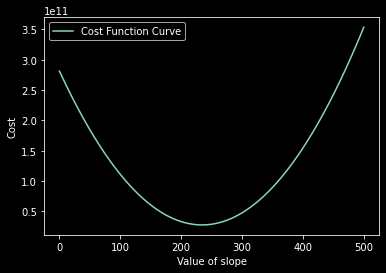

In [32]:
# plotting the cost values corresponding to every value of Beta

plt.plot(Cost_table.slope, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of slope')
plt.ylabel('Cost')
plt.legend()

# Using Cost Function Curve to find parameters of Linear Regression Model:-

In [33]:
new_slope = Cost_table['slope'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
new_slope[0]

234.3

In [34]:
def intercept_Error( slope, intercept ,  sample_data):
    sale = []
    for i in range(len(sample_data.flat_area)):
        tmp = sample_data.flat_area[i] * slope + intercept
        sale.append(tmp)
    MSE = mse(sample_data.sale_price, sale)
    return MSE

In [35]:
## Optimum value of c manually for this we will kept the value of slope constant.

intercept = [i for i in range(5000,50000)]
Cost = []
for i in intercept:
    cost = intercept_Error( slope = 234, intercept = i, sample_data = sample_data)
    Cost.append(cost)

In [36]:
# Arranging in DataFrame

Cost_table = pd.DataFrame({
    'intercept' : intercept,
    'Cost' : Cost
})
Cost_table.head()

,intercept,Cost
0,5000,2.779911e+10
1,5001,2.779909e+10
2,5002,2.779908e+10
3,5003,2.779907e+10
4,5004,2.779906e+10


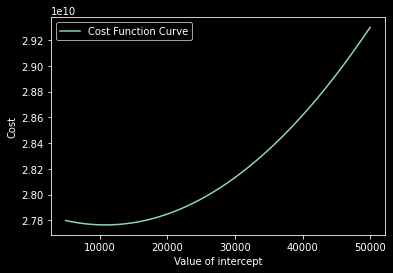

In [37]:
# plotting the cost values corresponding to every value of Beta

plt.plot(Cost_table.intercept, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of intercept')
plt.ylabel('Cost')
plt.legend()

In [38]:
new_intercept = Cost_table['intercept'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
new_intercept[0]

10834

In [39]:
slope = [i/10 for i in range(0,5000)]
Cost = []
for i in slope:
    cost = slope_Error( slope = i, intercept = 10834, sample_data = sample_data)
    Cost.append(cost)

In [40]:
# Arranging in DataFrame
Cost_table = pd.DataFrame({
    'slope' : slope,
    'Cost' : Cost
})
Cost_table.tail()

,slope,Cost
4995,499.5,3.636767e+11
4996,499.6,3.639259e+11
4997,499.7,3.641751e+11
4998,499.8,3.644245e+11
4999,499.9,3.646739e+11


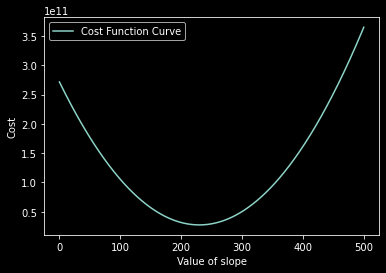

In [41]:
# plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.slope, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of slope')
plt.ylabel('Cost')
plt.legend()

In [42]:
new_slope = Cost_table['slope'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
new_slope[0]

229.7

In [43]:
intercept = [i for i in range(5000,50000)]
Cost = []
for i in intercept:
    cost = intercept_Error( slope = 229.7, intercept = i, sample_data = sample_data)
    Cost.append(cost)

In [44]:
# Arranging in DataFrame
Cost_table = pd.DataFrame({
    'intercept' : intercept,
    'Cost' : Cost
})
Cost_table.head()

,intercept,Cost
0,5000,2.781305e+10
1,5001,2.781302e+10
2,5002,2.781299e+10
3,5003,2.781296e+10
4,5004,2.781293e+10


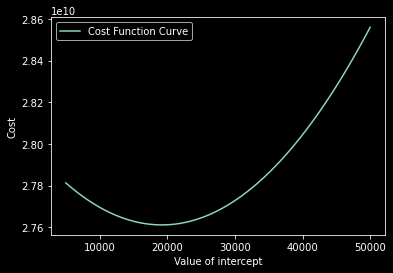

In [45]:
# plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.intercept, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of intercept')
plt.ylabel('Cost')
plt.legend()

In [46]:
new_intercept = Cost_table['intercept'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
new_intercept[0]

19199

# [3] UNDERSTANDING  GRADIENT DESCENT

In [47]:
## Step:-1 Initaialize Parameters


def param_init(Y):
  '''
  Y = target variable
  returns initialized values of m and c
  '''
  m = 0.1
  c = Y.mean()
  return m, c

In [48]:
## step:-2 Generate predictions


def generate_predictions(m, c, X):
  '''
  X = independent variable
  returns prediction generated by line with parameters m, c
  '''
  prediction = []
  for x in X:
    pred = (m * x) + c
    prediction.append(pred)
  return prediction

In [49]:
## Step:- 3 Calculating cost


def compute_cost(prediction, Y):
  '''
  returns the mean_squared_error between prediction and Y
  '''
  cost = np.sum(((prediction - Y)**2)/len(Y))
  return cost

In [50]:
## Step:-4 Updating parameters


def gradients(prediction, Y, X):
  '''
  Returns Gradients corresponding to m and c
  '''
  n = len(Y)
  Gm = 2/n * np.sum((prediction - Y) * X)
  Gc = 2/n * np.sum((prediction - Y))
  return Gm, Gc

In [51]:
## Updating the paramters using gradients


def param_update(m_old , c_old , Gm_old, Gc_old, alpha):
  '''
  Update and return the new values of m and c
  '''
  m_new = m_old - alpha * Gm_old
  c_new = c_old - alpha * Gc_old
  return m_new, c_new

In [52]:
def result(m, c, X, Y, cost, predictions, i):
  '''
  Print and plot the final result obtained from gradient descent
  '''
  ##If the Gradient Descent converged to the optimum value before max_iter
  if i < max_iter - 1 :
    print("***** Gradient Descent has converged at iteration {} *****".format(i))
  else:
    print("***** Result after", max_iter,'iterations is: *****')
  
  ## plotting the final result
  plt.figure(figsize = (14,7), dpi = 120)
  plt.scatter(X, Y, color = 'red', label = 'data points')
  label = 'final regression line: m = {}; c = {}'.format(str(m), str(c))
  plt.plot(X, predictions, color = 'green', label = label)
  plt.xlabel('flat_area')
  plt.ylabel('sale_price')
  plt.title('final regression line')
  plt.legend()

After Iteration 0 : m = 3499072.307222223 ; c = 465999.44299999997 ; Cost = 64177937552.075005
After Iteration 20 : m = 7.115927055971628e+105 ; c = 2.997778392048355e+102 ; Cost = 2.7417231010181384e+208
After Iteration 40 : m = 1.447154337383132e+205 ; c = 6.096532424296826e+201 ; Cost = inf
After Iteration 60 : m = 2.9430538842431367e+304 ; c = 1.2398417341018387e+301 ; Cost = inf
After Iteration 80 : m = nan ; c = nan ; Cost = nan
After Iteration 100 : m = nan ; c = nan ; Cost = nan
After Iteration 120 : m = nan ; c = nan ; Cost = nan
After Iteration 140 : m = nan ; c = nan ; Cost = nan
After Iteration 160 : m = nan ; c = nan ; Cost = nan
After Iteration 180 : m = nan ; c = nan ; Cost = nan
After Iteration 200 : m = nan ; c = nan ; Cost = nan
After Iteration 220 : m = nan ; c = nan ; Cost = nan
After Iteration 240 : m = nan ; c = nan ; Cost = nan
After Iteration 260 : m = nan ; c = nan ; Cost = nan
After Iteration 280 : m = nan ; c = nan ; Cost = nan
After Iteration 300 : m = nan ;

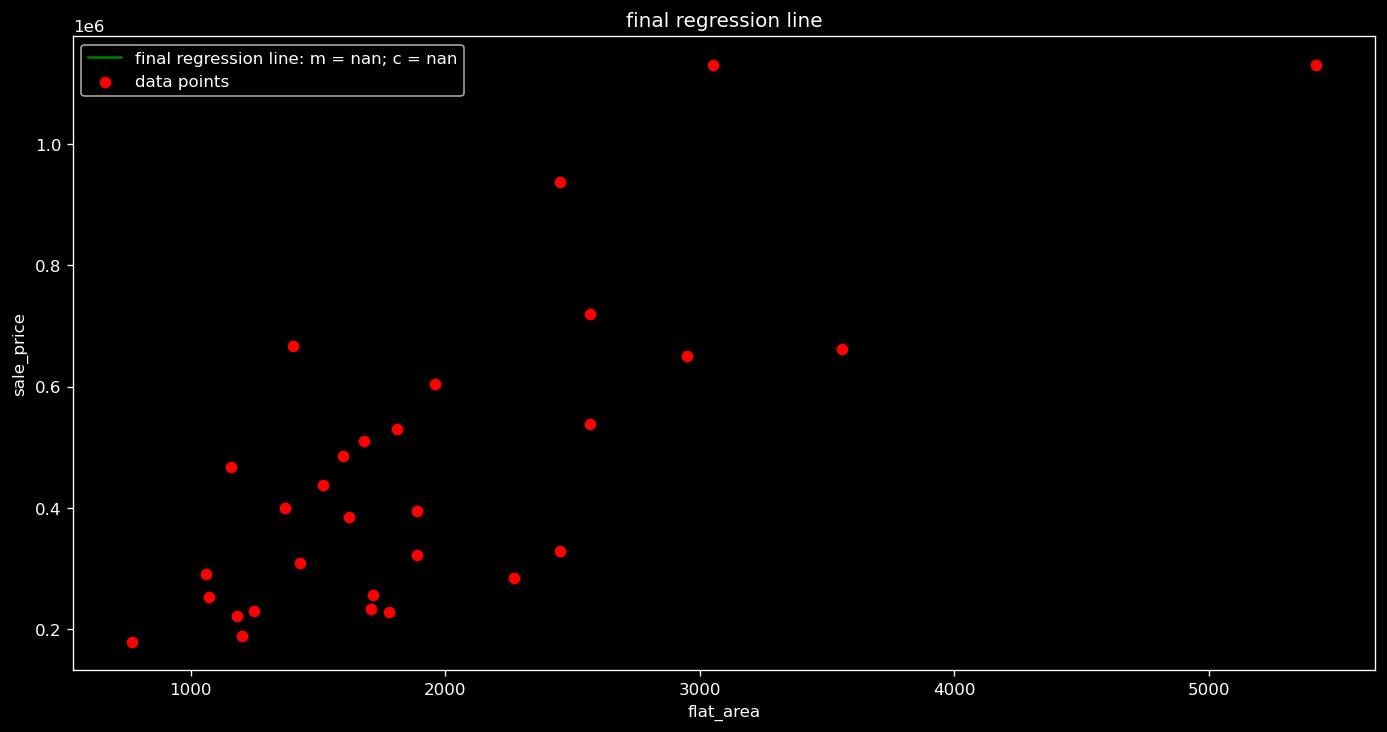

In [53]:
## defining and reshaping the dataset
sale_price = sample_data['sale_price'].values.reshape(-1,1)
flat_area = sample_data['flat_area'].values.reshape(-1,1)

## declaring parameters
max_iter = 1000
cost_old = 0
alpha = 0.01

## Step 1: inititialising the values of m, c
m , c = param_init(sale_price)

## Gradient Descent in action
for i in range(0 , max_iter):
  
  ## Step 2: genrating predictions
  predictions = generate_predictions(m , c , flat_area)

  ## Step 3: calculating cost
  cost_new = compute_cost(predictions , sale_price)

  ## checking if GD converged
  if abs(cost_new - cost_old) < 10**(-7):
    break
  
  ## calculating gradients
  Gm, Gc = gradients(predictions, sale_price,
                     flat_area)
  
  ## Step 4: updating parameters m and c
  m, c = param_update(m, c, Gm, Gc, alpha)

  ## display result after every 20 iterations
  if i%20 == 0:
    print('After Iteration', i,': m =', m, '; c =', c,'; Cost =', cost_new)

  ##updating cost_old
  cost_old = cost_new

## final results
result(m , c, flat_area, sale_price,
       cost_new, predictions, i)

After Iteration 0 : m = 0.11316346413633305 ; c = 1.1849780416165836e-16 ; Cost = 0.85836535863667
After Iteration 20 : m = 0.3275595607435688 ; c = 1.240489192847842e-16 ; Cost = 0.6182472245590185
After Iteration 40 : m = 0.4706921039517346 ; c = 1.3248661427193537e-16 ; Cost = 0.5112264752046607
After Iteration 60 : m = 0.5662485308150865 ; c = 1.415904430738617e-16 ; Cost = 0.46352728398628984
After Iteration 80 : m = 0.6300427631414932 ; c = 1.4951003398285442e-16 ; Cost = 0.4422677351921283
After Iteration 100 : m = 0.6726323011945988 ; c = 1.611303683072644e-16 ; Cost = 0.4327923457067555
After Iteration 120 : m = 0.7010654163122192 ; c = 1.666074685620818e-16 ; Cost = 0.42856916078553225
After Iteration 140 : m = 0.7200475906265729 ; c = 1.6660746856208182e-16 ; Cost = 0.4266868855601835
After Iteration 160 : m = 0.7327202415200801 ; c = 1.669405354694694e-16 ; Cost = 0.42584795473189874
After Iteration 180 : m = 0.7411806042798547 ; c = 1.6694053546946945e-16 ; Cost = 0.425474

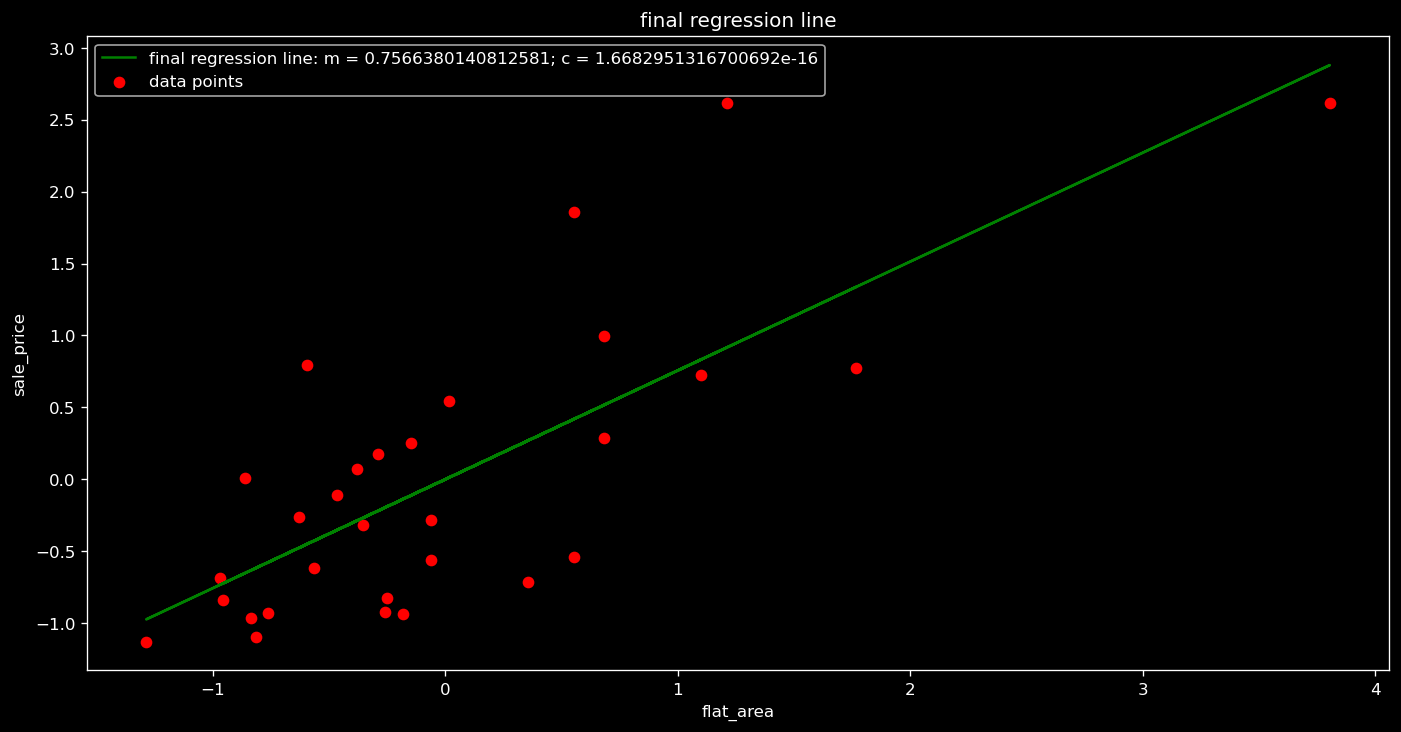

In [54]:
## scaling the dataset using the standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
sale_price = scaler.fit_transform(sample_data['sale_price'].values.reshape(-1,1))
flat_area = scaler.fit_transform(sample_data['flat_area'].values.reshape(-1,1))

## declaring parameters
max_iter = 1000
cost_old = 0
alpha = 0.01

## Step 1: inititialising the values of m, c
m , c = param_init(sale_price)

## Gradient Descent in action
for i in range(0 , max_iter):
  
  ## Step 2: genrating predictions
  predictions = generate_predictions(m , c , flat_area)

  ## Step 3: calculating cost
  cost_new = compute_cost(predictions , sale_price)

  ## checking if GD converged
  if abs(cost_new - cost_old) < 10**(-7):
    break
  
  ## calculating gradients
  Gm, Gc = gradients(predictions, sale_price,
                     flat_area)
  
  ## Step 4: updating parameters m and c
  m, c = param_update(m, c, Gm, Gc, alpha)

  ## display result after every 20 iterations
  if i%20 == 0:
    print('After Iteration', i,': m =', m, '; c =', c,'; Cost =', cost_new)

  ##updating cost_old
  cost_old = cost_new

## final results
result(m , c, flat_area, sale_price,
       cost_new, predictions, i)

# [4] IMPLEMENTING LINEAR REGRESSION

In [55]:
## [1] Importing libraries and dataset

data = pd.read_csv('Transformed_Housing_Data2.csv')
data.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [56]:
## [2] Scaling the Dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Sale_Price']
X = scaler.fit_transform(data.drop(columns = ['Sale_Price']))
X = pd.DataFrame(data = X, columns = data.drop(columns = ['Sale_Price']).columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.979905,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,0.533718,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-1.426369,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.130534,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.435436,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [57]:
## [3] Checking and Removing Multicollinearity

X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
No of Bedrooms,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,...,-0.006578,-0.010603,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694
No of Bathrooms,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,...,0.063761,-0.032810,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871
Flat Area (in Sqft),0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,...,0.103841,-0.058817,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253
Lot Area (in Sqft),0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,...,0.021605,0.023684,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671
No of Floors,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,...,0.023719,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868
No of Times Visited,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,...,0.401856,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923
Overall Grade,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,...,0.070332,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,...,0.072099,-0.028348,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398
Basement Area (in Sqft),0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,...,0.080595,-0.069149,-0.032302,0.006247,0.016422,0.040662,0.090206,0.051128,0.101159,0.023775
Age of House (in Years),-0.154113,-0.505954,-0.318146,-0.053119,-0.489244,0.053395,-0.456711,-0.423848,0.133072,1.000000,...,0.026149,-0.070111,0.022094,0.095882,-0.056974,-0.009965,0.025718,0.101486,-0.002705,-0.002492


In [58]:
## pair of independent variables with correlation greater than 0.5
k = X.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] >abs(0.5))&(i!=j)]
z, len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 

# Calculating VIF

In [59]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X

## Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF

No of Bedrooms                                  1.639470
No of Bathrooms                                 3.374992
Flat Area (in Sqft)                          1481.681648
Lot Area (in Sqft)                              2.108079
No of Floors                                    2.127787
No of Times Visited                             1.432385
Overall Grade                                   2.967448
Area of the House from Basement (in Sqft)    1205.549115
Basement Area (in Sqft)                       345.465009
Age of House (in Years)                         2.629539
Latitude                                        2.471442
Longitude                                       1.672691
Living Area after Renovation (in Sqft)          3.068139
Lot Area after Renovation (in Sqft)             2.144347
Years Since Renovation                          2.788098
Condition_of_the_House_Excellent               53.578111
Condition_of_the_House_Fair                   166.129930
Condition_of_the_House_Good    

In [60]:
VIF[VIF == VIF.max()].index[0]

'Flat Area (in Sqft)'

In [61]:
def MC_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
  if vif.max() > 5:
    print(vif[vif == vif.max()].index[0],'has been removed')
    data = data.drop(columns = [vif[vif == vif.max()].index[0]])
    return data
  else:
    print('No Multicollinearity present anymore')
    return data

In [62]:
for i in range(7):
  vif_data = MC_remover(vif_data)

vif_data.head()

Flat Area (in Sqft) has been removed
Condition_of_the_House_Fair has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Latitude,...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398724,-1.447526,-0.228291,-0.915389,-0.30579,-0.563993,-0.734722,-0.658697,0.544734,-0.352576,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398724,0.175684,-0.189858,0.936817,-0.30579,-0.563993,0.460990,0.245134,0.680915,1.161645,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.474115,-1.447526,-0.123276,-0.915389,-0.30579,-1.468566,-1.229916,-0.658697,1.293731,1.283619,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.676667,1.149611,-0.243983,-0.915389,-0.30579,-0.563993,-0.891735,1.397518,0.204281,-0.283288,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398724,-0.148958,-0.169628,-0.915389,-0.30579,0.340581,-0.130827,-0.658697,-0.544715,0.409587,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


# Remaining Columns

In [63]:
# Calculating VIF for remaining columns
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF, len(vif_data.columns)

(No of Bedrooms                               1.638990
 No of Bathrooms                              3.373805
 Lot Area (in Sqft)                           2.107495
 No of Floors                                 2.127703
 No of Times Visited                          1.432363
 Overall Grade                                2.956967
 Area of the House from Basement (in Sqft)    4.580042
 Basement Area (in Sqft)                      1.974981
 Age of House (in Years)                      2.626504
 Latitude                                     2.471343
 Longitude                                    1.672667
 Living Area after Renovation (in Sqft)       3.063886
 Lot Area after Renovation (in Sqft)          2.144068
 Years Since Renovation                       2.788064
 Condition_of_the_House_Excellent             1.206487
 Condition_of_the_House_Good                  1.251488
 Condition_of_the_House_Okay                  1.025386
 Ever_Renovated_Yes                           2.955539
 Waterfron

In [64]:
##[4] Creating Test/Train Set


X = vif_data
Y = data['Sale_Price']

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15126, 28), (6483, 28), (15126,), (6483,))

In [66]:
## [5] Linear regression


from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize = True)
lr.fit(x_train, y_train)

LinearRegression(normalize=True)

In [67]:
lr.coef_

array([ -3928.66247639,  12028.44560689,  14967.00497585,   2697.55278605,
        27220.31313417,  59965.44665815,  80697.80906997,  27729.56715434,
        27873.90231343,  21397.40341959, -23854.32640243,  17943.26729788,
        -2896.98542901, -10179.085198  ,  14239.3533334 ,   5095.97603572,
        -2296.64888137,  14594.33847962,  10761.77007875,  12165.83372082,
        33842.29544383,  63269.82875283,  81086.08553213,  50718.63947886,
        73274.09568028,  40153.03595158,  67405.70271285,  22113.74944051])

In [68]:
##[6] Generating the predictions over test set


predictions = lr.predict(x_test)
lr.score(x_test, y_test)

0.8461987715586199

# Residuals 

In [69]:
residuals = predictions - y_test

residual_table = pd.DataFrame({'residuals':residuals,
                    'predictions':predictions})
residual_table = residual_table.sort_values( by = 'predictions')

In [70]:
# 2 list

z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

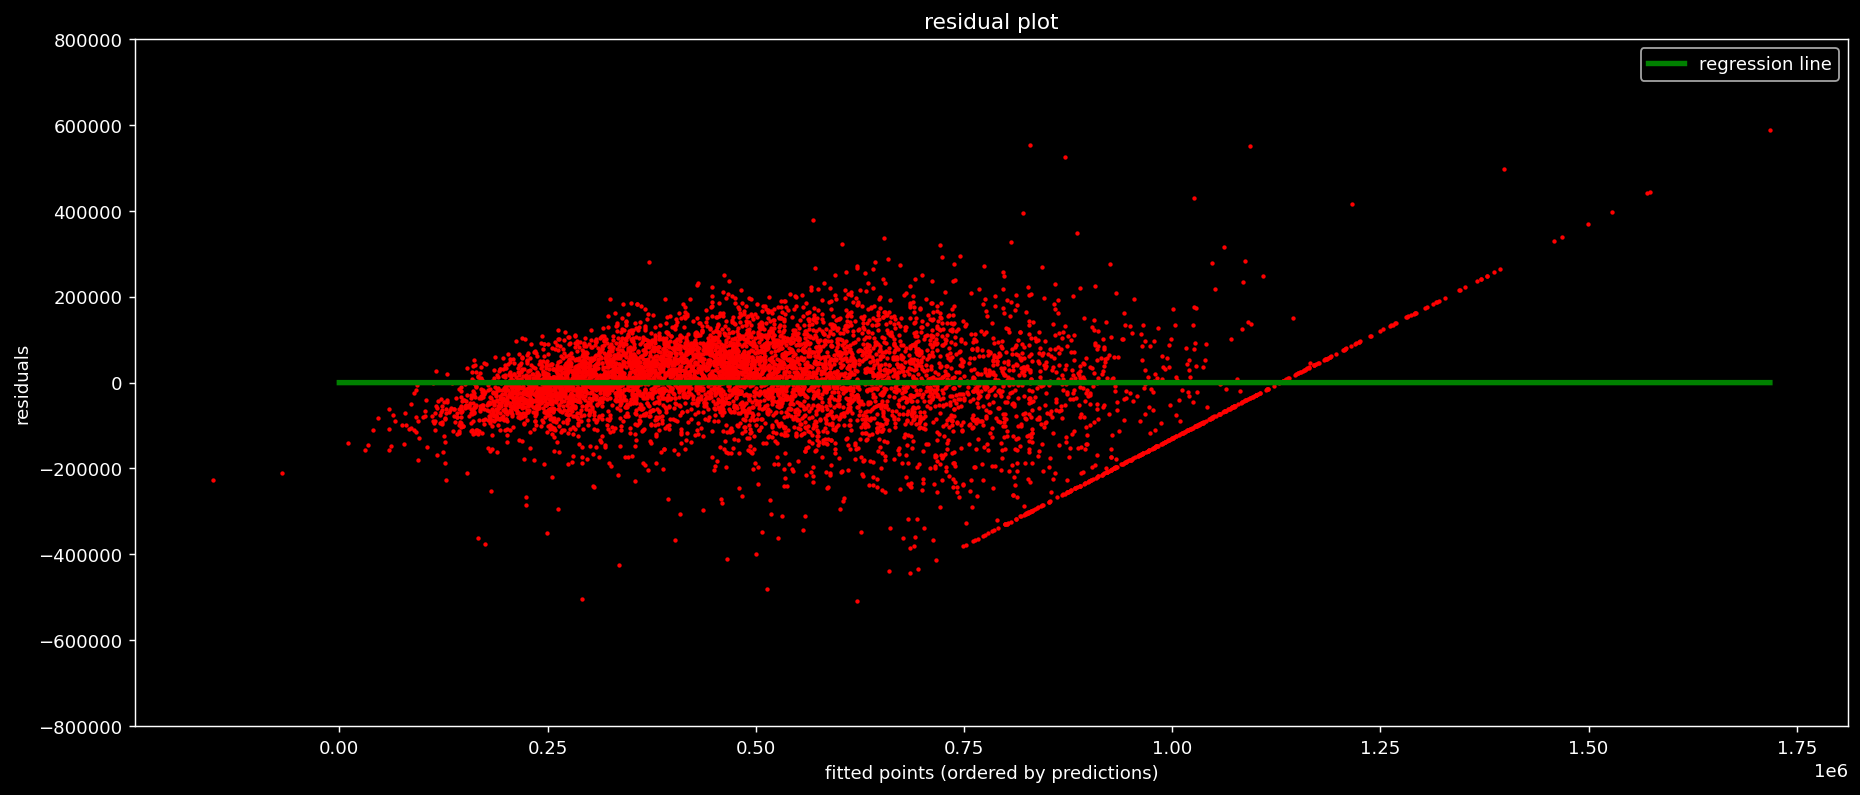

In [71]:
plt.figure(dpi = 130, figsize = (17,7))

plt.scatter( residual_table['predictions'], residual_table['residuals'], color = 'red', s = 2)
plt.plot(z, k, color = 'green', linewidth = 3, label = 'regression line')
plt.ylim(-800000, 800000)
plt.xlabel('fitted points (ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

# Distribution of errors

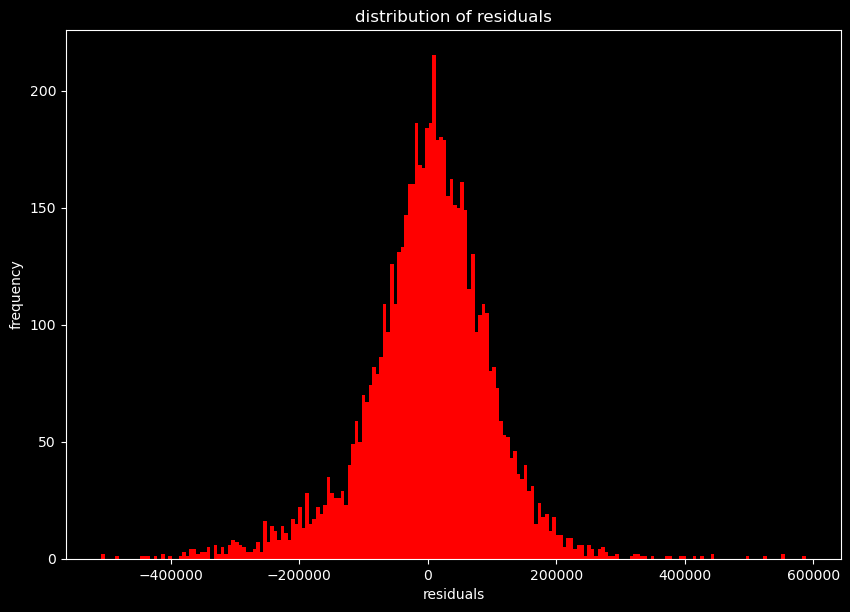

In [72]:
plt.figure(dpi = 100, figsize = (10,7))
plt.hist(residual_table['residuals'], color = 'red', bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

# Model Coefficients

In [73]:
coefficients_table = pd.DataFrame({'column': x_train.columns,
                                  'coefficients': lr.coef_})
coefficient_table = coefficients_table.sort_values(by = 'coefficients')


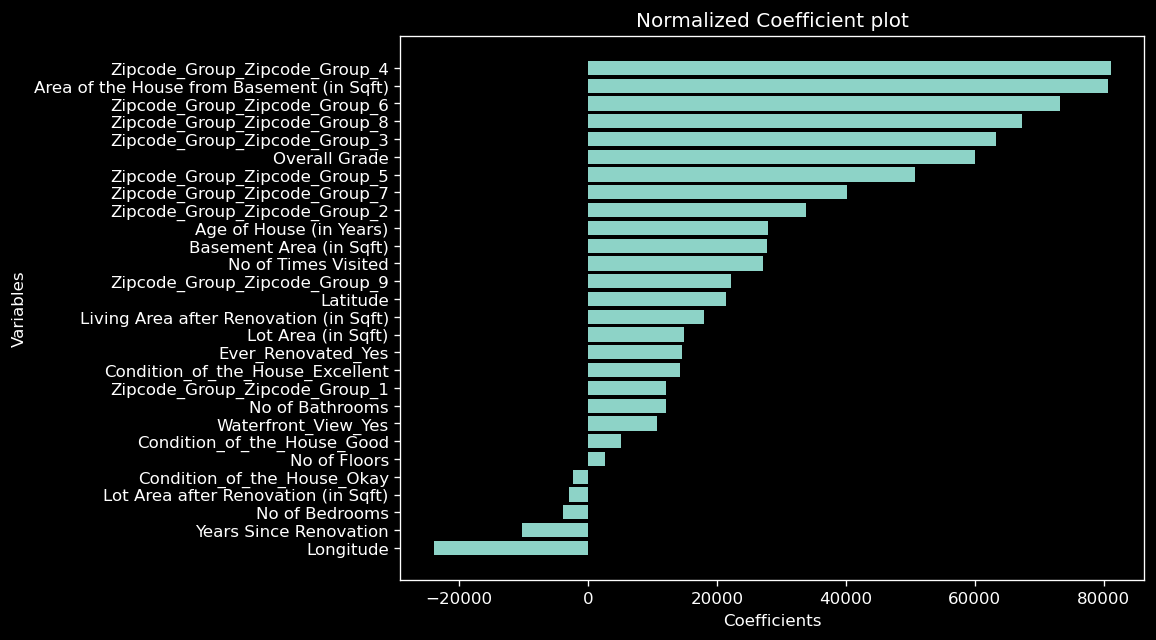

In [74]:
plt.figure(figsize=(8, 6), dpi=120)
x = coefficient_table['column']
y = coefficient_table['coefficients']
plt.barh( x, y)
plt.xlabel( "Coefficients")
plt.ylabel('Variables')
plt.title('Normalized Coefficient plot')
plt.show()

# [5] FEATURE ENGINEERING

In [75]:
data = pd.read_csv('Raw_Housing_Prices3.csv')
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [76]:
sum(data.isnull().sum())

0

# Feature Transformation

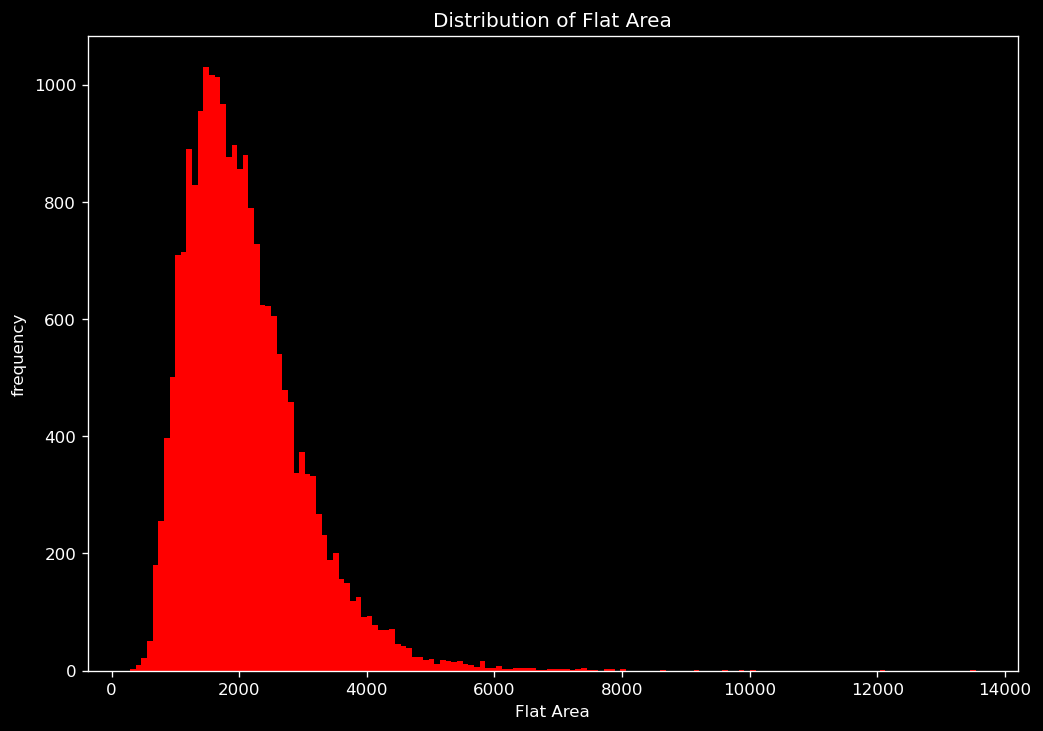

In [77]:
plt.figure( figsize = (10,7), dpi = 120)
plt.hist(data['Flat Area (in Sqft)'], bins = 150, color = 'red')
plt.xlabel('Flat Area')
plt.ylabel('frequency')
plt.title('Distribution of Flat Area')
plt.show()

In [78]:
def log_transform(sample_data):
  return np.log(sample_data)

In [79]:
## map function converts the element of flat area to their logarithm value

data['Transformed Flat Area'] = data['Flat Area (in Sqft)'].map(log_transform)

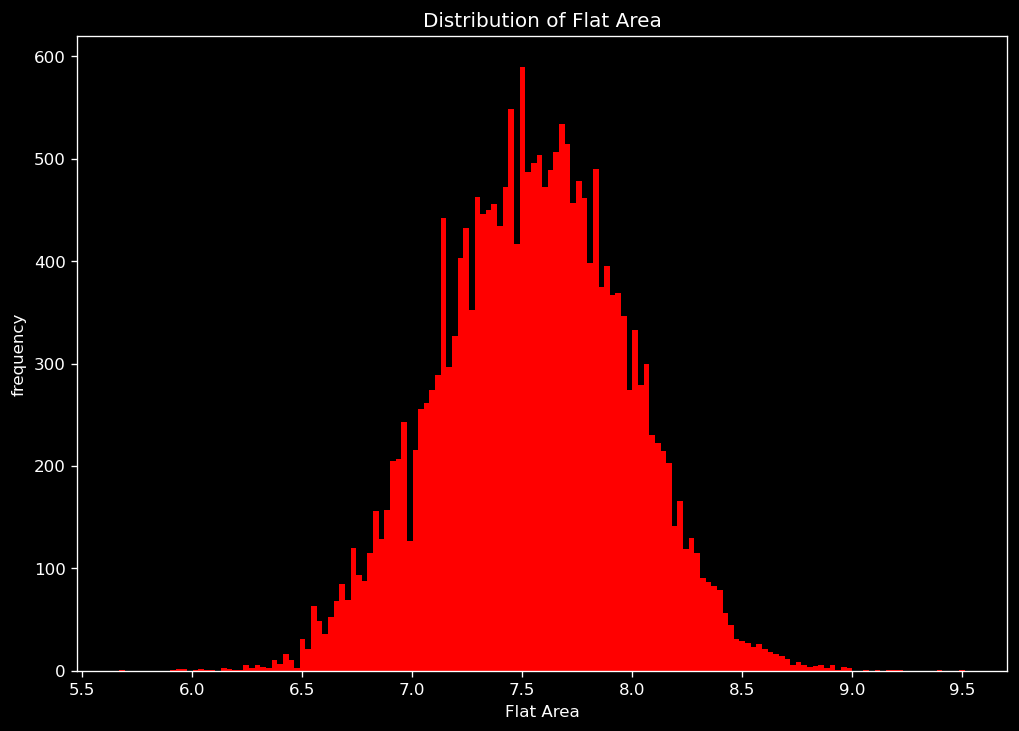

In [80]:
## Visualize the new column

plt.figure( figsize = (10,7), dpi = 120)
plt.hist(data['Transformed Flat Area'], bins = 150, color = 'red')
plt.xlabel('Flat Area')
plt.ylabel('frequency')
plt.title('Distribution of Flat Area')
plt.show()

# Dummy/One Hot Encoding

In [81]:
data['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [82]:
dummy_var1 = pd.get_dummies( data['Condition of the House'], drop_first = True, prefix = 'Condition')
dummy_var1.head()

,Condition_Excellent,Condition_Fair,Condition_Good,Condition_Okay
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


# Label Encoding

In [83]:
label_encoded = data['Condition of the House']
label_encoded.value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

In [84]:
label_encoded = label_encoded.map({ 'Bad':1,
                                    'Okay':2,
                                    'Fair':3,
                                    'Good':4,
                                    'Excellent':5})
label_encoded.value_counts()

3    14028
4     5678
5     1701
2      172
1       30
Name: Condition of the House, dtype: int64

# Binning

In [ ]:
# Sparse BINNIG

In [94]:
data['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [95]:
data['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

In [96]:
mean = []

for i in data['Condition of the House'].unique():
  mean.append(data['Sale Price'][data['Condition of the House'] == i].mean())

Text(0, 0.5, 'mean sale Prie')

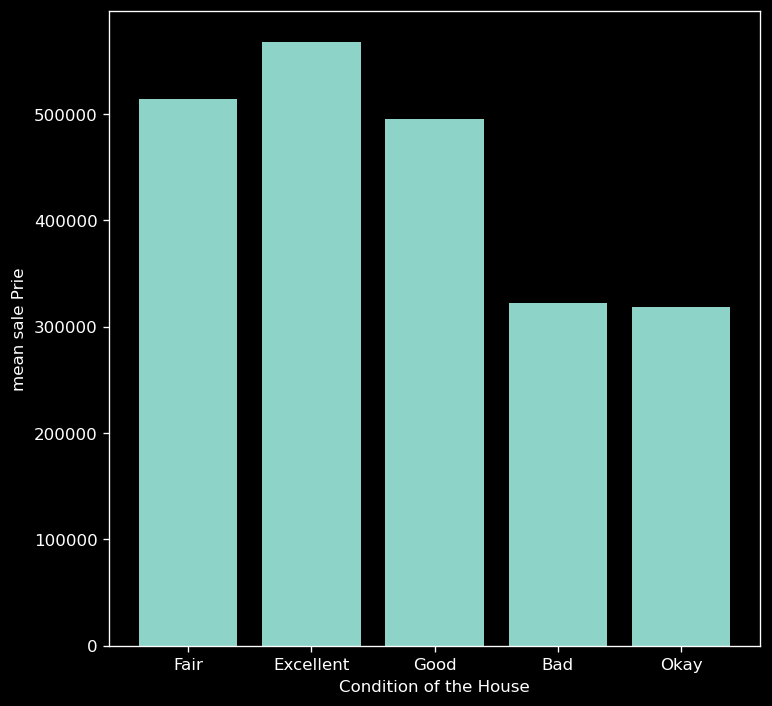

In [97]:
plt.figure( figsize = (7,7), dpi = 120)

plt.bar( data['Condition of the House'].unique(), mean)
plt.xlabel('Condition of the House')
plt.ylabel("mean sale Prie")

In [98]:
mapping = {'Excellent':'Excellent',
           'Fair':'Good',
           'Good':'Good',
           'Okay':'Okay',
           'Bad':'Okay'}
data['Condition of the House'] = data['Condition of the House'].map(mapping)

In [99]:
mean = []

for i in data['Condition of the House'].unique():
  mean.append(data['Sale Price'][data['Condition of the House'] == i].mean())

Text(0, 0.5, 'mean sale Prie')

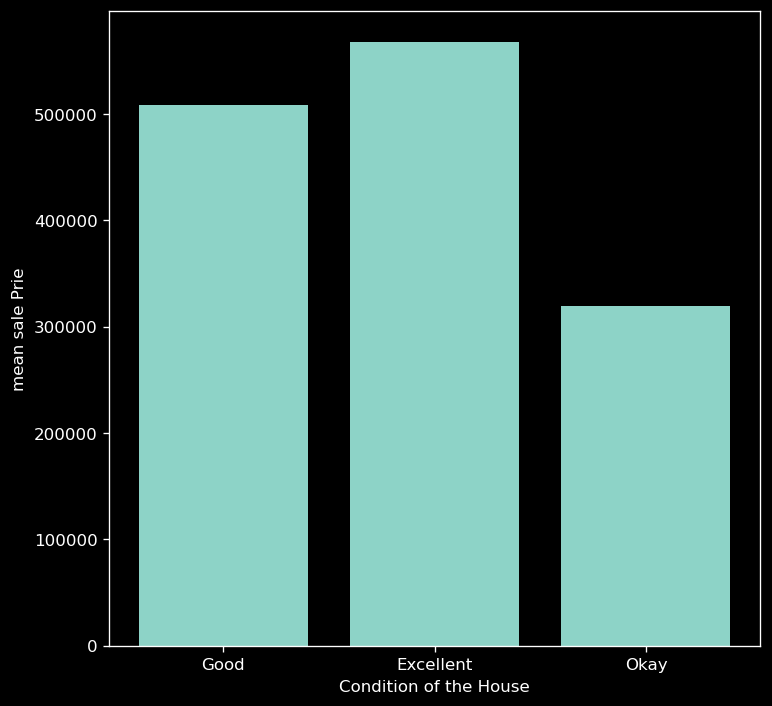

In [100]:
plt.figure( figsize = (7,7), dpi = 120)

plt.bar( data['Condition of the House'].unique(), mean)
plt.xlabel('Condition of the House')
plt.ylabel("mean sale Prie")

In [ ]:
#Continuous Variables (BINNING)

In [101]:
len(data['Age of House (in Years)'].unique())

116

In [102]:
data['Age of House (in Years)'].max()

118

In [103]:
data['Age of House (in Years)'].min()

3

In [106]:
def age_of_house(x):
  if x < 10:
    x = 'new'
  elif x < 50:
    x = 'old'
  else:
    x = 'very old'
  return x

In [107]:
cat_house_age = data['Age of House (in Years)'].map(age_of_house)
cat_house_age.unique()

array(['very old', 'old', 'new'], dtype=object)

# Feature Generation

#feature Extraction

In [212]:
data['Date House was Sold'].head()

0     14 October 2017
1    14 December 2017
2    15 February 2016
3    14 December 2017
4    15 February 2016
Name: Date House was Sold, dtype: object

In [117]:
time = pd.DatetimeIndex(data['Date House was Sold'])
data['year_sold'] = time.year
data["month_sold"] = time.month
data['weekday_sold'] = time.day_name
data['date_sold'] = time.days_in_month

data[['year_sold','month_sold','weekday_sold','date_sold']].head()

,year_sold,month_sold,weekday_sold,date_sold
0,2017,10,<bound method inherit_from_data.<locals>.metho...,31
1,2017,12,<bound method inherit_from_data.<locals>.metho...,31
2,2016,2,<bound method inherit_from_data.<locals>.metho...,29
3,2017,12,<bound method inherit_from_data.<locals>.metho...,31
4,2016,2,<bound method inherit_from_data.<locals>.metho...,29


In [112]:
month_sale = pd.pivot_table(data, values = 'Sale Price',
               columns = 'month_sold',
                aggfunc = 'mean')

month_sale

month_sold,1,2,3,4,5,6,7,8,9,10,11,12
Sale Price,494549.626789,485457.269015,515501.697439,533078.767817,518714.583092,527367.035337,519160.693351,507810.789691,502577.903044,508442.986155,495134.871722,497170.721278


Text(0, 0.5, 'mean_sale')

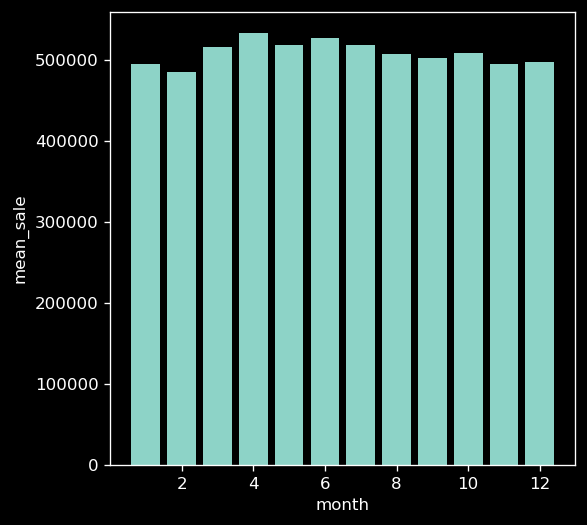

In [113]:
plt.figure( figsize = (5,5), dpi = 120)
plt.bar(month_sale.columns, month_sale.iloc[0])
plt.xlabel("month")
plt.ylabel('mean_sale')

In [114]:
weekday_sale = pd.pivot_table(data, values = 'Sale Price',
               columns = 'weekday_sold',
                aggfunc = 'mean')

weekday_sale

weekday_sold,"<bound method inherit_from_data.<locals>.method of DatetimeIndex(['2017-10-14', '2017-12-14', '2016-02-15', '2017-12-14',\n '2016-02-15', '2017-05-14', '2017-06-14', '2016-01-15',\n '2016-04-15', '2016-03-15',\n ...\n '2017-08-14', '2016-01-15', '2017-10-14', '2016-03-15',\n '2016-02-15', '2017-05-14', '2016-02-15', '2017-06-14',\n '2016-01-15', '2017-10-14'],\n dtype='datetime64[ns]', name='Date House was Sold', length=21609, freq=None)>"
Sale Price,511618.558147


TypeError: the dtypes of parameters x (object) and width (float64) are incompatible

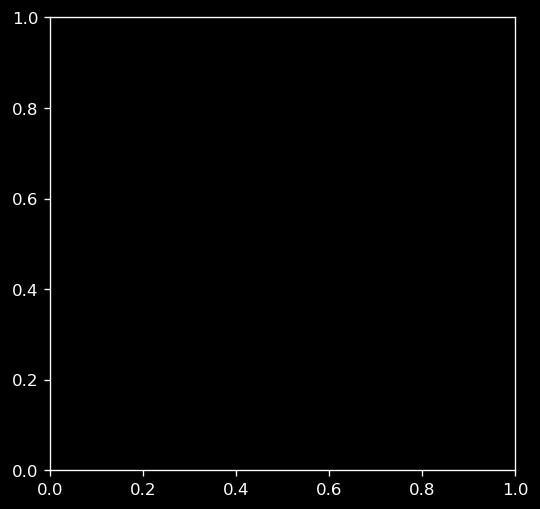

In [116]:
plt.figure( figsize = (5,5), dpi = 120)
plt.bar(weekday_sale.columns , weekday_sale.iloc[0])
plt.xlabel("Weekday")
plt.ylabel('mean_sale')

In [218]:
date_sale = pd.pivot_table(data, values = 'Sale Price',
               columns = 'date_sold',
                aggfunc = 'mean')

date_sale

KeyError: 'date_sold'

In [219]:
plt.figure( figsize = (5,5), dpi = 120)
plt.bar(weekday_sale.columns, weekday_sale.iloc[0])
plt.xlabel("Date of month")
plt.ylabel('mean_sale')

NameError: name 'weekday_sale' is not defined

<Figure size 600x600 with 0 Axes>

Text(0, 0.5, 'frequency ratio')

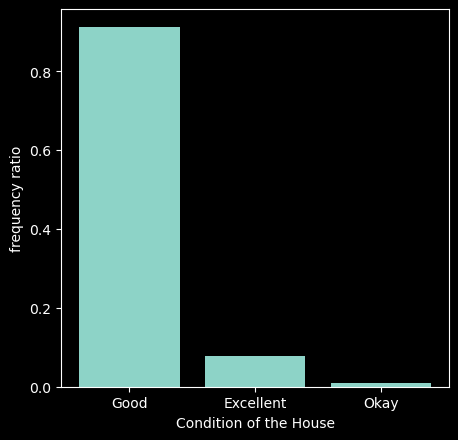

In [220]:
freq_condition = data['Condition of the House'].value_counts()
freq_condition = freq_condition/freq_condition.sum()

plt.figure( figsize = (5,5), dpi = 100)
plt.bar(freq_condition.index, freq_condition)
plt.xlabel('Condition of the House')
plt.ylabel('frequency ratio')

In [221]:
data['freq_cond'] = 0

for i in data['Condition of the House'].unique():
  data['freq_cond'][data['Condition of the House']==i] = freq_condition.loc[i]

data['freq_cond'].head()

0    0.911935
1    0.911935
2    0.911935
3    0.078717
4    0.911935
Name: freq_cond, dtype: float64

In [222]:
data.columns

Index(['ID', 'Date House was Sold', 'Sale Price', 'No of Bedrooms',
       'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Floors', 'Waterfront View', 'No of Times Visited',
       'Condition of the House', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)', 'Transformed Flat Area',
       'year_sold', 'month_sold', 'freq_cond'],
      dtype='object')

In [223]:
def luxury_home(row):
  count = 0
  if row[0] =='Yes':
    count = count+1
  if row[1] in ['Excellent','Good']:
    count = count+1
  if row[2] >= 8:
    count = count+1  
  if count >= 2 :
    return 'Yes'
  else:
    return "No"
  
data['luxury_home'] = data[['Waterfront View','Condition of the House','Overall Grade']].apply(luxury_home, axis = 1)

data['luxury_home'].unique()

array(['No', 'Yes'], dtype=object)

In [225]:
data['luxury_home'].value_counts()

No     11285
Yes    10324
Name: luxury_home, dtype: int64

In [224]:
luxury = data.pivot_table(values = "Sale Price", columns = 'luxury_home', aggfunc = 'mean' )
luxury

luxury_home,No,Yes
Sale Price,380385.64475,655067.166021


Text(0, 0.5, ' Mean Sale Price')

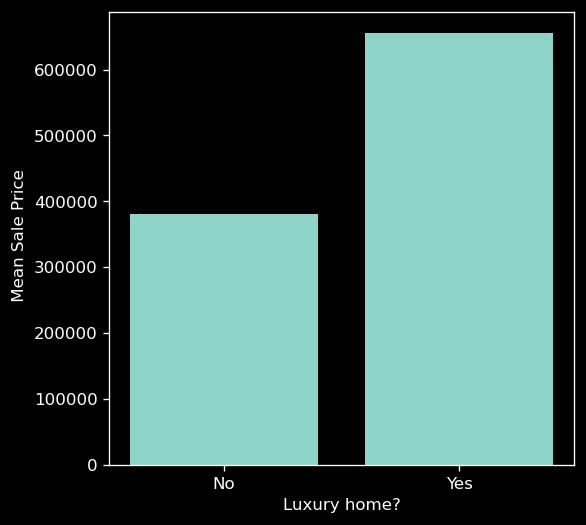

In [226]:
plt.figure(figsize = (5,5), dpi = 120)
plt.bar(luxury.columns, luxury.iloc[0])
plt.xlabel('Luxury home?')
plt.ylabel(" Mean Sale Price")


In [227]:
import os
import multiprocessing

mem_bytes = os.sysconf('SC_PAGE_SIZE') * os.sysconf('SC_PHYS_PAGES')  # e.g. 4015976448
mem_gib = mem_bytes/(1024.**3)  # e.g. 3.74
print("RAM: %f GB" % mem_gib)
print("CORES: %d" % multiprocessing.cpu_count())

AttributeError: module 'os' has no attribute 'sysconf'